#### Importación de Librerías

In [1]:
# Análisis y procesamiento de datos
import pandas as pd
import numpy as np

# Visualización de datos
import matplotlib.pyplot as plt

# Preprocesamiento de datos
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Modelos de aprendizaje
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

# Guardado de modelos
import joblib
from tensorflow.keras.models import load_model

# Modelos
# K-means
from sklearn.cluster import KMeans

# Red Neuronal (MLP)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


#### Carga de Datos

In [2]:
df = pd.read_csv("dataLimpia.csv")
df.head()


,Edad,Altura,Peso,estado_fisico,salud,alimentacion,fruta_consumo,verdura_consumo,genero,actividad_fisica,...,motivo__Salud,disponibilidad_tiempo,experiencia_fuerza,experiencia_cardio,acceso,preferencia_area,intensidad,IMC,grasa_corporal,grasa_corporal_magra
0,22,1.59,145.0,7.0,9.0,3.0,4.0,4.0,0,0,...,1,0,0,0,0,0,0,26.07,30.94,48.73
1,22,1.84,205.0,7.0,9.0,3.0,2.0,3.0,1,1,...,0,1,0,0,1,1,0,27.52,21.88,67.54
2,20,1.70,122.0,1.0,7.0,4.0,2.0,2.0,1,1,...,0,1,0,0,0,2,1,19.19,11.43,44.81
3,25,1.63,120.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,2,...,0,1,0,1,0,3,0,20.53,24.99,43.35
4,18,1.71,110.0,4.0,6.0,3.0,3.0,4.0,1,1,...,0,1,1,1,0,4,0,17.10,8.46,41.45


In [3]:
df.shape


(318, 43)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318 entries, 0 to 317
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Edad                           318 non-null    int64  
 1   Altura                         318 non-null    float64
 2   Peso                           318 non-null    float64
 3   estado_fisico                  318 non-null    float64
 4   salud                          318 non-null    float64
 5   alimentacion                   318 non-null    float64
 6   fruta_consumo                  318 non-null    float64
 7   verdura_consumo                318 non-null    float64
 8   genero                         318 non-null    int64  
 9   actividad_fisica               318 non-null    int64  
 10  dias_entreno                   318 non-null    int64  
 11  horas_entreno                  318 non-null    int64  
 12  entreno_constante              318 non-null    int

In [5]:
df.columns

Index(['Edad', 'Altura', 'Peso', 'estado_fisico', 'salud', 'alimentacion',
       'fruta_consumo', 'verdura_consumo', 'genero', 'actividad_fisica',
       'dias_entreno', 'horas_entreno', 'entreno_constante', 'enfoque',
       'areas__Abdomen', 'areas__Brazo', 'areas__Cardio', 'areas__Espalda',
       'areas__Pecho', 'areas__Pierna', 'efectividad', 'consumo__Creatina',
       'consumo__Nada', 'consumo__Otro', 'consumo__Pre-Entreno',
       'consumo_proteina', 'horas_dormir', 'fuente_energia1',
       'fuente_energia2', 'agua', 'motivo__Aumentodemasamuscular',
       'motivo__Definicion_muscular', 'motivo__Perdida_Peso', 'motivo__Salud',
       'disponibilidad_tiempo', 'experiencia_fuerza', 'experiencia_cardio',
       'acceso', 'preferencia_area', 'intensidad', 'IMC', 'grasa_corporal',
       'grasa_corporal_magra'],
      dtype='object')

#### Preprocesamiento de datos

In [6]:
# Escalamiento de datos
cols_to_exclude = ['preferencia_area']
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop(cols_to_exclude, axis=1))
df_scaled = pd.DataFrame(df_scaled, columns=df.drop(cols_to_exclude, axis=1).columns)
df_scaled = pd.concat([df_scaled, df[cols_to_exclude]], axis=1)


#### Extracción y Reducción de Atributos

In [7]:
# Se utiliza el método PCA para reducir la dimensionalidad de los datos
pca = PCA(n_components=3, random_state=0)
pca.fit(df_scaled)
df_pca = pca.transform(df_scaled)
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2', 'PC3'])

# print(df_pca.shape)
df_pca.head()


,PC1,PC2,PC3
0,-1.285879,-0.538886,2.521749
1,-3.265664,-2.559416,-1.766409
2,-2.518723,1.508580,-2.548696
3,6.493576,1.190595,-1.108679
4,-2.343444,2.686739,-2.596005


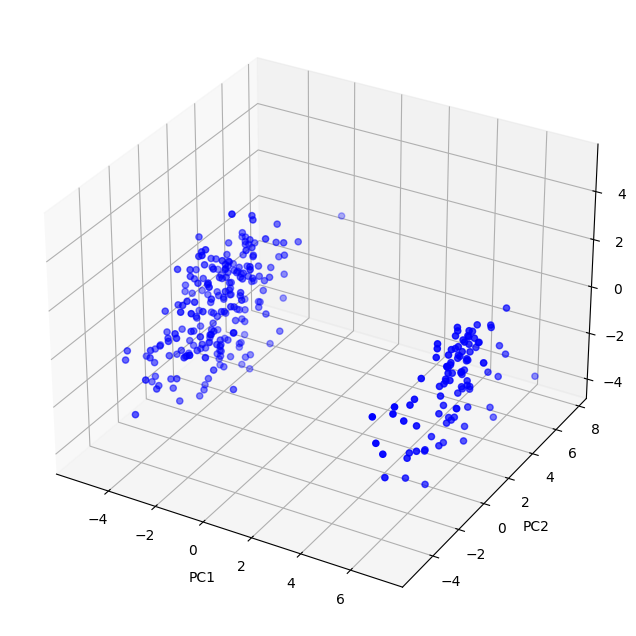

In [8]:
# Se grafican los datos en 3 dimensiones
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c='blue')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()


#### Agrupamiento de Datos

In [9]:
# Se emplea el método del codo para determinar el número óptimo de clusters
distortions = []
inertias = []
distortionMap = {}
inertiaMap = {}
K = range(1, 10)

for k in K:
    # Creación y entrenamiento del modelo
    kmeanModel = KMeans(n_clusters=k, n_init=10).fit(df_pca)
    kmeanModel.fit(df_pca)

    distortions.append(sum(np.min(cdist(df_pca, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df_pca.shape[0])
    inertias.append(kmeanModel.inertia_)

    distortionMap[k] = sum(np.min(cdist(df_pca, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df_pca.shape[0]
    inertiaMap[k] = kmeanModel.inertia_


#### Valores de los Valores de la Distorción

In [10]:
for key, val in distortionMap.items():
    print(f'{key} : {val}')


1 : 4.907952116025517
2 : 2.359646816726338
3 : 2.0059879531367213
4 : 1.8112855791751696
5 : 1.6853769515160026
6 : 1.5306389510327658
7 : 1.426620369758203
8 : 1.3675126634921762
9 : 1.3065380984174373


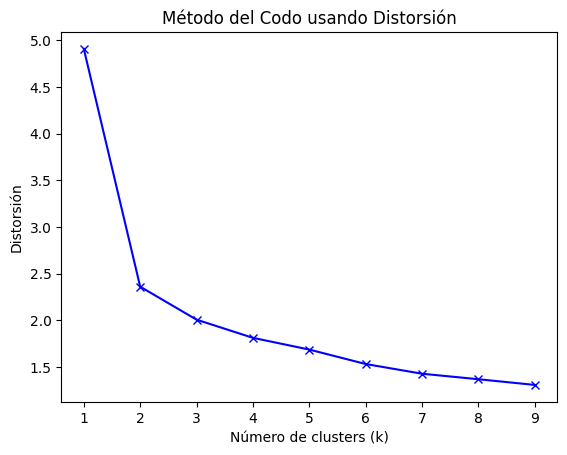

In [11]:
# Plot de los resultados, para observar el "codo"
plt.plot(K, distortions, 'bx-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Distorsión')
plt.title('Método del Codo usando Distorsión')
plt.show()


#### Uso de los Valores de la Inercia

In [12]:
for key, val in inertiaMap.items():
    print(f'{key} : {val}')


1 : 8583.254747317907
2 : 2183.8823507405896
3 : 1662.8886257363197
4 : 1358.3493319049223
5 : 1120.4193889934713
6 : 942.5181082786294
7 : 805.4574222511663
8 : 728.0293606482387
9 : 659.9309488471971


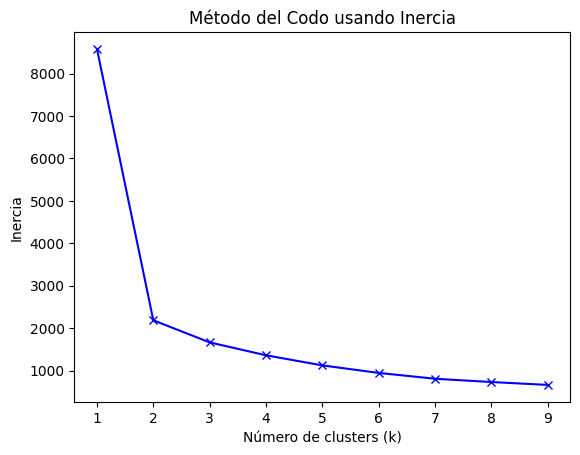

In [13]:
# Plot de los resultados, para observar el "codo"
plt.plot(K, inertias, 'bx-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo usando Inercia')
plt.show()


Para determinar el número apropiado de los clusters, se selecciona el valor de K en el "codo" del gráfico; es decir, el punto después del cual la distorsión o inercia comienzan a disminuir en una forma lineal. Por lo que se concluye que el número óptimo de en este caso es 5.

#### Visualización de los Clusters

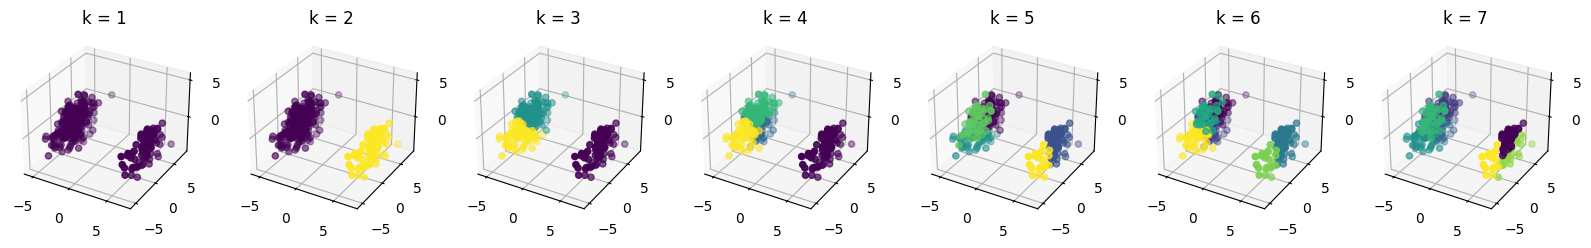

In [14]:
# Creación de un plot con 7 subplots, para observar los resultados de los
# modelos con diferentes valores de k
fig, axes = plt.subplots(1, 7, figsize=(20, 5), subplot_kw={'projection': '3d'})

for i, k in enumerate(range(1, 8)):
    # Creación y entrenamiento del modelo
    model = KMeans(n_clusters=k, n_init=10)
    model.fit(df_pca)
    labels = model.labels_

    # Se grafican los datos en 3 dimensiones
    ax = axes[i]
    ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c=labels)
    ax.set_title(f'k = {k}')

plt.show()


#### Creación del Modelo Híbrido

##### K-Means

In [15]:
# Creación del modelo de K-means
clusters = 5
kmeans = KMeans(n_clusters=clusters, n_init=10, random_state=0)
kmeans.fit(df_pca)


KMeans(n_clusters=5, n_init=10, random_state=0)

In [16]:
# Guardado del modelo
joblib.dump(kmeans, 'models/kmeans.pkl')

['models/kmeans.pkl']

In [17]:
# Etiquetas de los clusters
y = kmeans.labels_


Text(0.5, 0, 'PC3')

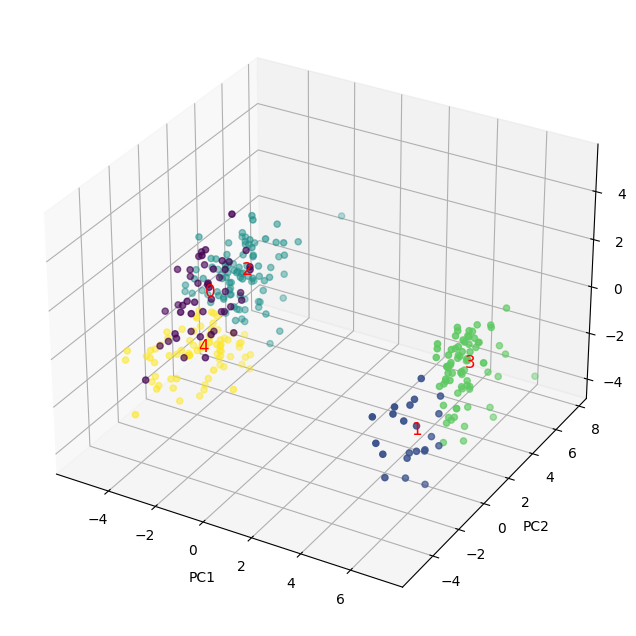

In [18]:
# Visualización de los clusters y etiquetar cada uno de 0 a 4
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of data points with color-coded labels
ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c=kmeans.labels_)
# ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c=kmeans.labels_, cmap='Greys')

# Centroid coordinates
centroids = kmeans.cluster_centers_

# Plot centroids as numbers from 0 to 1
for i, (cent_x, cent_y, cent_z) in enumerate(centroids):
    ax.text(cent_x, cent_y, cent_z, str(i), color='red', fontsize=12)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')


In [19]:
# División de los índices de las filas que pertenecen a cada cluster
cluster_0 = df_pca[kmeans.labels_ == 0].index
cluster_1 = df_pca[kmeans.labels_ == 1].index
cluster_2 = df_pca[kmeans.labels_ == 2].index
cluster_3 = df_pca[kmeans.labels_ == 3].index
cluster_4 = df_pca[kmeans.labels_ == 4].index

cluster_combo = [x for x in cluster_4]

# Obtener las filas cuyos índices corresponden a los clusters 0 y 3
cluster_combo = df.iloc[cluster_combo]
cluster_combo['horas_dormir'].value_counts()


0    42
1    25
2    11
Name: horas_dormir, dtype: int64

In [20]:
# Show how many points are in each cluster
pd.Series(kmeans.labels_).value_counts()

2    94
4    78
3    76
0    48
1    22
dtype: int64

In [21]:
# Codificación de las etiquetas
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y.reshape(-1, 1))


In [22]:
# Guardado del encoder
joblib.dump(encoder, 'models/encoder.pkl')


['models/encoder.pkl']

In [23]:
# División de los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_pca, y, test_size=0.2, random_state=0)


##### Red Neuronal de Perceptrón Multicapa

In [24]:
# Creación del modelo de Red Neuronal
mlp = Sequential()

# Capa de entrada
mlp.add(Dense(10, input_dim=3, activation='relu'))

# Capa oculta
mlp.add(Dense(10, activation='relu'))

# Capa de salida
mlp.add(Dense(5, activation='softmax'))


In [25]:
# Compilación del modelo
mlp.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [26]:
# Entrenamiento del modelo
mlp.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)


In [27]:
# Guardado del modelo
mlp.save('models/mlp.h5')


#### Predicción de datos

In [28]:
user_classes = ['Intermedio', 'Principiante', 'Intermedio', 'Principiante', 'Avanzado']

# Use the trained model to predict the class for the test users
cluster_labels = kmeans.predict(X_test)
one_hot_labels = encoder.transform(cluster_labels.reshape(-1, 1))

# Map the predicted classes to the actual classes
class_labels = np.argmax(one_hot_labels, axis=1)
print("La clase predicha es: ", str(class_labels))

# Map the class labels to the actual classes
class_labels = [user_classes[label] for label in class_labels]
print("La clase predicha es: ", str(class_labels))


La clase predicha es:  [0 2 4 3 3 4 4 3 4 2 2 4 3 4 3 0 2 0 0 4 4 4 2 0 1 1 2 4 1 3 3 0 2 3 3 2 3
 4 4 0 0 0 4 0 2 1 0 4 2 3 3 1 3 4 4 2 4 3 0 4 4 2 1 3]
La clase predicha es:  ['Intermedio', 'Intermedio', 'Avanzado', 'Principiante', 'Principiante', 'Avanzado', 'Avanzado', 'Principiante', 'Avanzado', 'Intermedio', 'Intermedio', 'Avanzado', 'Principiante', 'Avanzado', 'Principiante', 'Intermedio', 'Intermedio', 'Intermedio', 'Intermedio', 'Avanzado', 'Avanzado', 'Avanzado', 'Intermedio', 'Intermedio', 'Principiante', 'Principiante', 'Intermedio', 'Avanzado', 'Principiante', 'Principiante', 'Principiante', 'Intermedio', 'Intermedio', 'Principiante', 'Principiante', 'Intermedio', 'Principiante', 'Avanzado', 'Avanzado', 'Intermedio', 'Intermedio', 'Intermedio', 'Avanzado', 'Intermedio', 'Intermedio', 'Principiante', 'Intermedio', 'Avanzado', 'Intermedio', 'Principiante', 'Principiante', 'Principiante', 'Principiante', 'Avanzado', 'Avanzado', 'Intermedio', 'Avanzado', 'Principiante', 'Inter

##### Carga de los modelos

In [29]:
kmeans = joblib.load('models/kmeans.pkl')
encoder = joblib.load('models/encoder.pkl')
mlp = load_model('models/mlp.h5')


In [30]:
# Use the trained model to predict the class for the test users
cluster_labels = kmeans.predict(X_test)
one_hot_labels = encoder.transform(cluster_labels.reshape(-1, 1))

# Map the predicted classes to the actual classes
class_labels = np.argmax(one_hot_labels, axis=1)
print("La clase predicha es: ", str(class_labels))

# Map the class labels to the actual classes
class_labels = [user_classes[label] for label in class_labels]
print("La clase predicha es: ", str(class_labels))


La clase predicha es:  [0 2 4 3 3 4 4 3 4 2 2 4 3 4 3 0 2 0 0 4 4 4 2 0 1 1 2 4 1 3 3 0 2 3 3 2 3
 4 4 0 0 0 4 0 2 1 0 4 2 3 3 1 3 4 4 2 4 3 0 4 4 2 1 3]
La clase predicha es:  ['Intermedio', 'Intermedio', 'Avanzado', 'Principiante', 'Principiante', 'Avanzado', 'Avanzado', 'Principiante', 'Avanzado', 'Intermedio', 'Intermedio', 'Avanzado', 'Principiante', 'Avanzado', 'Principiante', 'Intermedio', 'Intermedio', 'Intermedio', 'Intermedio', 'Avanzado', 'Avanzado', 'Avanzado', 'Intermedio', 'Intermedio', 'Principiante', 'Principiante', 'Intermedio', 'Avanzado', 'Principiante', 'Principiante', 'Principiante', 'Intermedio', 'Intermedio', 'Principiante', 'Principiante', 'Intermedio', 'Principiante', 'Avanzado', 'Avanzado', 'Intermedio', 'Intermedio', 'Intermedio', 'Avanzado', 'Intermedio', 'Intermedio', 'Principiante', 'Intermedio', 'Avanzado', 'Intermedio', 'Principiante', 'Principiante', 'Principiante', 'Principiante', 'Avanzado', 'Avanzado', 'Intermedio', 'Avanzado', 'Principiante', 'Inter